# Programming in Python
## Exam: July 19, 2021


You can solve the exercises below by using standard Python 3.9 libraries, NumPy, Matplotlib, Pandas, PyMC3.
You can browse the documentation: [Python](https://docs.python.org/3.9/), [NumPy](https://numpy.org/doc/stable/user/index.html), [Matplotlib](https://matplotlib.org/3.3.1/contents.html), [Pandas](https://pandas.pydata.org/pandas-docs/version/1.2.5/), [PyMC3](https://docs.pymc.io/).
You can also look at the [slides of the course](https://homes.di.unimi.it/monga/lucidi2021/pyqb00.pdf) or your code on [GitHub](https://github.com).

**It is forbidden to communicate with others.** 


In [3]:
%matplotlib inline
import numpy as np   # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pymc3 as pm   # type: ignore

### Exercise 1 (max 3 points)

Consider a bidimensional grid with 33x33 dots. Plot the dots.

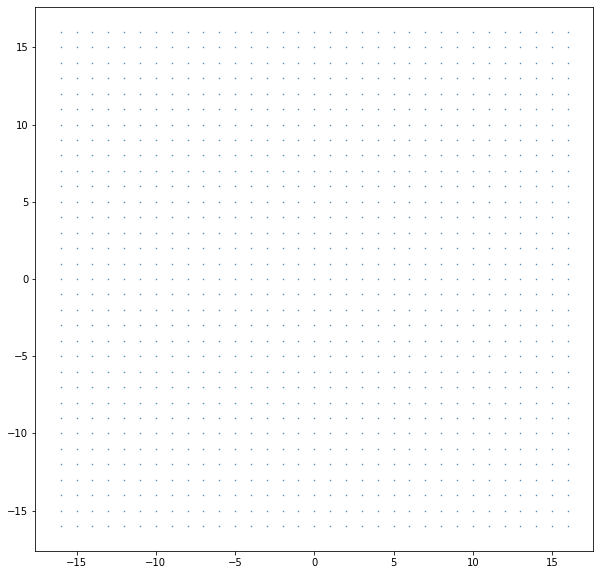

In [4]:
x = np.linspace(-16, 16, 33)
y = np.linspace(-16, 16, 33)
grid = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize=(10,10))
_ = ax.scatter(grid[0], grid[1], s=.2)

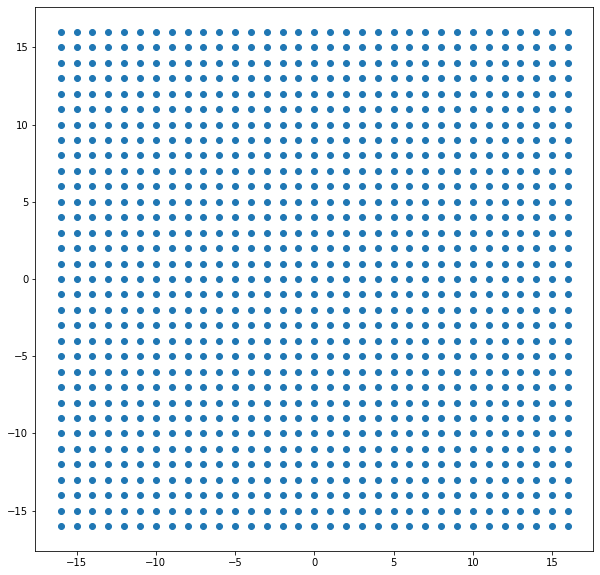

In [5]:
fig, ax= plt.subplots(figsize=(10,10))
_=ax.scatter(grid[0],grid[1])

### Exercise 2 (max 5 points)

On the grid defined in Exercise 1, compute 5 random walks, starting in the central dot, going on for 100 steps of 1 in the horizontal, vertical or both directions. When a walk reaches the border of the grid, it starts again on the opposite side: in other words, on a line of dots to the left of the leftmost dot there is the rightmost one; same on the right, above, and below.

In [6]:
def one_step(start: tuple[int, int], step: tuple[int, int], dim: int = 16) -> tuple[int, int]:
    """Return the point after a step applied to start. 
    The borders are at -dim and dim. 
    
    >>> one_step((2, 1), (1, 1))
    (3, 2)
    
    >>> one_step((0,16), (0, 1))
    (0, -16)
    """
    
    ris = [0, 0]
    for axis in (0, 1):
        ris[axis] = start[axis] + step[axis]
        
        if ris[axis] > dim:
            ris[axis] = ris[axis] - dim*2 - 1
        elif ris[axis] < -dim:
            ris[axis] = ris[axis] + dim*2 + 1
    
    return (ris[0], ris[1])    


# +
walk = np.zeros((5, 100, 2))

for w in range(0, 5):
    steps = np.random.randint(-1, 1+1, size=(100-1, 2))

    i = 1
    for s in steps:
        walk[w][i] = np.array(one_step((walk[w][i-1][0], walk[w][i-1][1]), (s[0], s[1])))
        i = i + 1

In [7]:
for w in range(0, 5):
    steps = np.random.randint(-1, 1+1, size=(100-1, 2))

    i = 1
    for s in steps:
        walk[w][i] = np.array(one_step((walk[w][i-1][0], walk[w][i-1][1]), (s[0], s[1])))
        i = i + 1

In [8]:
step=np.random.randint(-1, 2, size=(99,2))
step

array([[ 1,  0],
       [ 1,  1],
       [-1, -1],
       [-1,  1],
       [ 0,  1],
       [ 1,  1],
       [ 1, -1],
       [ 1,  0],
       [-1, -1],
       [ 1,  0],
       [ 0,  0],
       [ 0, -1],
       [-1, -1],
       [ 0,  1],
       [ 1,  0],
       [ 0,  1],
       [ 0, -1],
       [ 1,  0],
       [ 0,  1],
       [ 0, -1],
       [ 1, -1],
       [ 1,  1],
       [ 1, -1],
       [-1,  0],
       [ 0,  0],
       [-1,  0],
       [ 0,  1],
       [ 1,  0],
       [ 1, -1],
       [ 0,  1],
       [ 1,  0],
       [ 1, -1],
       [-1,  1],
       [ 0, -1],
       [ 1, -1],
       [ 1, -1],
       [ 1, -1],
       [ 0, -1],
       [-1,  0],
       [ 1, -1],
       [ 0,  1],
       [ 1, -1],
       [-1,  1],
       [ 0, -1],
       [ 0, -1],
       [ 0,  1],
       [ 0,  1],
       [ 0, -1],
       [ 0,  0],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [ 0,  1],
       [-1,  1],
       [-1, -1],
       [-1, -1],
       [-1,  0],
       [ 0, -1],
       [ 1,  0

### Exercise 3 (max 3 points)

Plot the walks computed in Exercise 2.

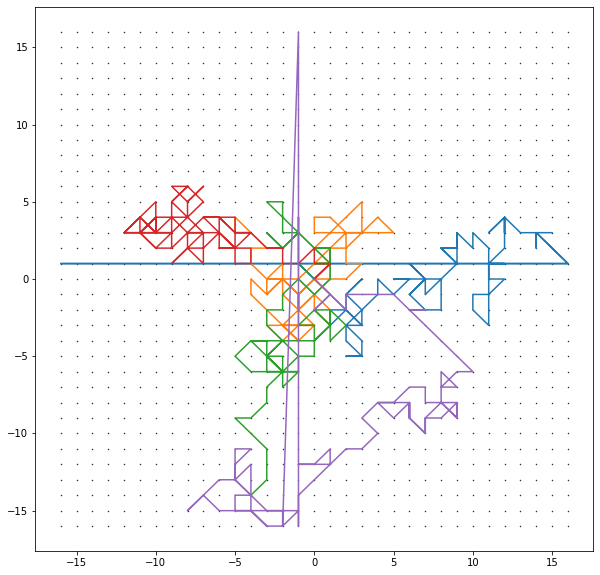

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(grid[0], grid[1], s=.2, color='black')
for w in range(0,5):
    _ = ax.plot(walk[w,:,0],walk[w,:,1])

### Exercise 4 (max 7 points)

Define a function that takes two random walks and computes a new one. The resulting walk:
- has a length equal to the sum of the lengths of the given walks minus one
- the first half is the first given
- the second half is the second given, traslated such as the first step is applied to the last position of the first given walk

For example: if the two walks are `[(0,0), (1,1)]` and `[(0,0), (0,-1)]`, the resulting walk will be `[(0,0), (1,1), (1,0)]`


To get the full marks, you should declare correctly the type hints (the signature of the function) and add a doctest string.

In [10]:
def append_walk(w1: list[tuple[int, int]], w2: list[tuple[int, int]], dim: int = 16) -> list[tuple[int, int]]:
    """Append w2 to w1.
    
    >>> append_walk([(0, 0), (1, 1)], [(0, 0), (0, -1)])
    [(0, 0), (1, 1), (1, 0)]
    
    """
    
    ris = w1
    i = len(w1) - 1
    for p in w2[1:]:
        iw = i - len(w1) + 1
        s = (p[0] - w2[iw][0], p[1] -  w2[iw][1])
        ris.append(one_step(w1[i], s))
        i = i + 1
       
    return ris

### Exercise 5 (max 2 points)

Load the data contained in the file `iris.csv` in a Pandas DataFrame.

In [19]:
iris = pd.read_csv('iris.csv', sep=',')
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
o=iris.groupby('class')
o.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


### Exercise 6 (max 3 points)


Add to the dataframe two columns for the ratio between width and length, for petals and sepals.

In [13]:
iris['petal ratio'] = iris['petal width'] / iris['petal length']
iris['sepal ratio'] = iris['sepal width'] / iris['sepal length']

In [14]:
setosa=iris.loc[iris['class']=='Iris-setosa']
versicolor=iris.loc[iris['class']=='Iris-versicolor']
virginica=iris.loc[iris['class']=='Iris-virginica']

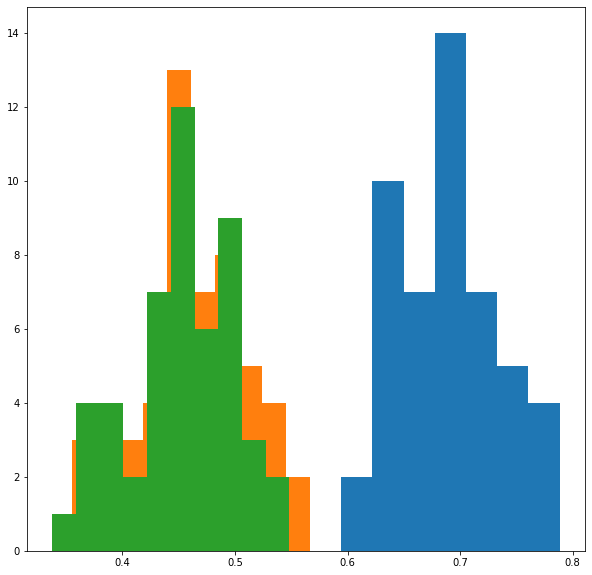

In [15]:
fig, ax= plt.subplots(figsize=(10,10))
_=ax.hist(setosa['sepal ratio'])
_=ax.hist(versicolor['sepal ratio'])
_=ax.hist(virginica['sepal ratio'])

### Exercise 7 (max 5 points)

Plot the histograms of the sepal ratio computed in Exercise 6 for each iris class. Put the three plots in a single chart.

sepal length                                              \
                       count   mean       std  min    25%  50%  75%  max   
class                                                                      
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal width         ... petal ratio           sepal ratio  \
                      count   mean  ...         75%       max       count   
class                               ...                                     
Iris-setosa            50.0  3.428  ...    0.213346  0.375000        50.0   
Iris-versicolor        50.0  2.770  ...    0.331522  0.375000        50.0   
Iris-virginica         50.0  2.974  ...    0.398214  0.470588        50.0   

                                                                             \
                     mean       std       min       25%       50%       75%   
class                                                                         
Iris-setosa      0.684248  0.051871  0.511111  0.648756  0.683502  0.721667   
Iris-versicolor  0.467680  0.046829  0.354839  0.447890  0.462687  0.491659   
Iris-virginica   0.453396  0.047015  0.337662  0.426815  0.460928  0.492182   

                           
                      max  
class                      
Iris-setosa      0.788462  
Iris-versicolor  0.566667  
Iris-virginica   0.548387  

[3 rows x 48 columns]

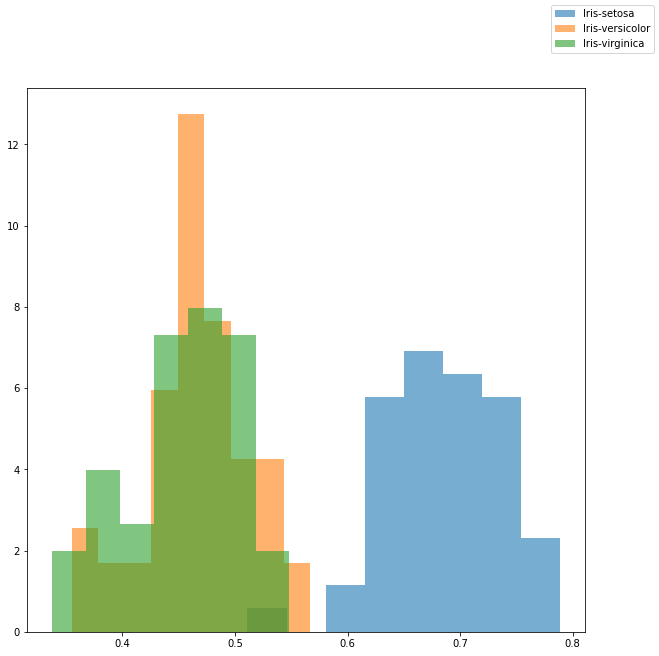

In [16]:
ig = iris.groupby('class')
fig, ax = plt.subplots(figsize=(10,10))
for g in ig.groups.keys():
    ax.hist(ig.get_group(g)['sepal ratio'], bins='auto', density=True, alpha=.6, label=g)
_ = fig.legend()
ig.describe()

### Exercise 8 (max 5 points)

Consider this statistical model: the sepal ratio of Iris-setosa and Iris-virginica is normally distributed, with an unknown mean, and a standard deviation of 1. Your *a priori* estimation of the mean for both distribution is a normal distribution with mean 0.5 and standard deviation 0.1. Use PyMC to sample the posterior distributions after having seen the actual values for Iris-setosa and Iris-virginica.  Plot the results.

In [17]:
mymodel = pm.Model()


with mymodel:
    mu_s = pm.Normal('mu_s', 0.5, 0.1)
    mu_v = pm.Normal('mu_v', 0.5, 0.1)
    
    sr_s = pm.Normal('sr_s', mu=mu_s, sigma=1, observed=iris.query('`class` == "Iris-setosa"')['sepal ratio'])
    sr_v = pm.Normal('sr_v', mu=mu_v, sigma=1, observed=iris.query('`class` == "Iris-virginica"')['sepal ratio'])
    
    post = pm.sample()
    

<ipython-input-17-a808679645ae>:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  post = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_v, mu_s]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


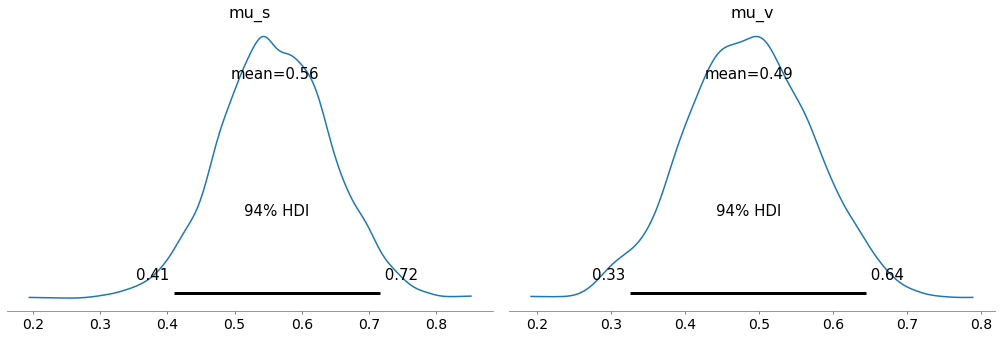

In [18]:
with mymodel:
    pm.plot_posterior(post)

In [19]:
n=0

In [20]:
while(n<10):
    print(n)
    n=n+1

0
1
2
3
4
5
6
7
8
9


In [25]:
n

0

In [15]:
def fun( y: np.ndarray , x: int, g: float = 1.3) -> np.ndarray:
    y[0]=x
    for i in range(1,len(y)-1):
        y[i]=y[i-1]*g
    return y
    
    

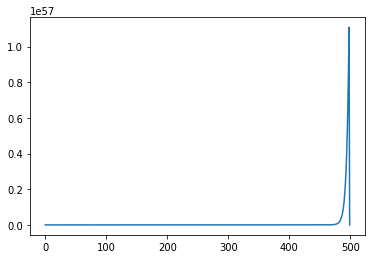